#### IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#import tensorflow as tf
#from tensorflow import keras

from sklearn.preprocessing import MinMaxScaler

#from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, LSTM

#from tensorflow.keras.callbacks import EarlyStopping

#### LOAD AND READ THE DATASET

In [4]:
data=pd.read_excel(r"C:\Users\STUDENT\Desktop\DA LAB III _QP\SET 2\Air Quality Index_DA LAB III.xlsx")

In [5]:
data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
0,Thiruvananthapuram,2017-06-23,15.08,31.09,1.94,5.80,4.65,NaN,0.71,4.65,17.54,47.0
1,Thiruvananthapuram,2017-06-24,11.15,22.15,1.87,6.07,4.69,NaN,0.60,4.12,16.65,44.0
2,Thiruvananthapuram,2017-06-25,12.25,23.53,1.88,5.22,4.29,NaN,0.56,3.83,18.70,38.0
3,Thiruvananthapuram,2017-06-26,10.06,22.58,1.98,4.74,4.13,NaN,0.47,3.73,19.53,37.0
4,Thiruvananthapuram,2017-06-27,13.03,21.61,1.90,6.64,5.03,NaN,0.64,4.00,14.46,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1100,Thiruvananthapuram,2020-06-27,18.06,36.04,8.19,9.50,12.46,6.57,0.61,8.38,29.89,42.0
1101,Thiruvananthapuram,2020-06-28,22.51,43.97,7.00,7.38,9.57,6.09,0.61,8.32,27.73,43.0
1102,Thiruvananthapuram,2020-06-29,23.17,46.71,8.87,10.75,12.88,5.65,0.68,8.07,25.61,49.0
1103,Thiruvananthapuram,2020-06-30,20.66,41.53,8.65,9.93,12.41,5.88,0.53,8.40,26.00,40.0


## 2) DATA PREPROCESSING

In [6]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
0,Thiruvananthapuram,2017-06-23,15.08,31.09,1.94,5.80,4.65,NaN,0.71,4.65,17.54,47.0
1,Thiruvananthapuram,2017-06-24,11.15,22.15,1.87,6.07,4.69,NaN,0.60,4.12,16.65,44.0
2,Thiruvananthapuram,2017-06-25,12.25,23.53,1.88,5.22,4.29,NaN,0.56,3.83,18.70,38.0
3,Thiruvananthapuram,2017-06-26,10.06,22.58,1.98,4.74,4.13,NaN,0.47,3.73,19.53,37.0
4,Thiruvananthapuram,2017-06-27,13.03,21.61,1.90,6.64,5.03,NaN,0.64,4.00,14.46,46.0


In [8]:
data.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
1100,Thiruvananthapuram,2020-06-27,18.06,36.04,8.19,9.50,12.46,6.57,0.61,8.38,29.89,42.0
1101,Thiruvananthapuram,2020-06-28,22.51,43.97,7.00,7.38,9.57,6.09,0.61,8.32,27.73,43.0
1102,Thiruvananthapuram,2020-06-29,23.17,46.71,8.87,10.75,12.88,5.65,0.68,8.07,25.61,49.0
1103,Thiruvananthapuram,2020-06-30,20.66,41.53,8.65,9.93,12.41,5.88,0.53,8.40,26.00,40.0
1104,Thiruvananthapuram,2020-07-01,2.00,35.00,1.68,2.30,2.58,5.62,0.42,6.15,22.10,41.0


In [9]:
data.isnull()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
0,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1100,False,False,False,False,False,False,False,False,False,False,False,False
1101,False,False,False,False,False,False,False,False,False,False,False,False
1102,False,False,False,False,False,False,False,False,False,False,False,False
1103,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
count,1066.000000,1070.000000,1077.000000,1077.000000,1092.000000,999.000000,1092.000000,1077.000000,1077.000000,1052.000000
mean,28.045901,52.949953,3.461811,9.391291,8.194093,5.061902,0.952106,5.662182,34.743315,75.878327
std,17.843642,24.018704,3.658476,6.006485,6.458936,3.677780,0.531853,3.971979,17.997789,28.396178
min,2.000000,10.500000,0.480000,1.350000,0.000000,1.020000,0.000000,0.410000,2.620000,32.000000
25%,14.910000,34.270000,1.380000,4.980000,4.037500,2.470000,0.680000,3.440000,21.950000,57.000000
50%,22.350000,48.405000,2.050000,7.610000,6.455000,4.020000,0.895000,5.360000,33.480000,68.000000
75%,36.790000,67.185000,3.250000,12.090000,9.930000,6.355000,1.082500,6.680000,45.880000,89.000000
max,98.870000,178.240000,31.490000,30.540000,38.700000,26.580000,5.590000,35.330000,97.280000,230.000000


#### CHECKING AND REMOVING NULL VALUES

In [11]:
#checking for null values
data.isnull().sum()

City       0
Date       0
PM2.5     39
PM10      35
NO        28
NO2       28
NOx       13
NH3      106
CO        13
SO2       28
O3        28
AQI       53
dtype: int64

removing null values

In [14]:
#removing null values
data['PM2.5'].fillna(data['PM2.5'].mean(),inplace=True)

In [15]:
data['PM10'].fillna(data['PM10'].mean(),inplace=True)

In [16]:
data['NO'].fillna(data['NO'].mean(),inplace=True)

In [17]:
data['NO2'].fillna(data['NO2'].mean(),inplace=True)

In [18]:
data['NOx'].fillna(data['NOx'].mean(),inplace=True)

In [19]:
data['NH3'].fillna(data['NH3'].mean(),inplace=True)

In [20]:
data['CO'].fillna(data['CO'].mean(),inplace=True)

In [21]:
data['SO2'].fillna(data['SO2'].mean(),inplace=True)

In [22]:
data['O3'].fillna(data['O3'].mean(),inplace=True)

In [23]:
data['AQI'].fillna(data['AQI'].mean(),inplace=True)

In [24]:
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
count,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000
mean,28.045901,52.949953,3.461811,9.391291,8.194093,5.061902,0.952106,5.662182,34.743315,75.878327
std,17.525636,23.634906,3.611784,5.929826,6.420795,3.496766,0.528713,3.921287,17.768090,27.706184
min,2.000000,10.500000,0.480000,1.350000,0.000000,1.020000,0.000000,0.410000,2.620000,32.000000
25%,15.100000,34.610000,1.440000,5.040000,4.050000,2.590000,0.690000,3.490000,22.350000,57.000000
50%,23.190000,49.140000,2.110000,7.850000,6.500000,4.470000,0.900000,5.430000,34.090000,69.000000
75%,36.230000,65.950000,3.461811,11.870000,9.850000,6.060000,1.080000,6.640000,45.510000,87.000000
max,98.870000,178.240000,31.490000,30.540000,38.700000,26.580000,5.590000,35.330000,97.280000,230.000000


In [25]:
data.isnull().sum()

City     0
Date     0
PM2.5    0
PM10     0
NO       0
NO2      0
NOx      0
NH3      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105 entries, 0 to 1104
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   City    1105 non-null   object        
 1   Date    1105 non-null   datetime64[ns]
 2   PM2.5   1105 non-null   float64       
 3   PM10    1105 non-null   float64       
 4   NO      1105 non-null   float64       
 5   NO2     1105 non-null   float64       
 6   NOx     1105 non-null   float64       
 7   NH3     1105 non-null   float64       
 8   CO      1105 non-null   float64       
 9   SO2     1105 non-null   float64       
 10  O3      1105 non-null   float64       
 11  AQI     1105 non-null   float64       
dtypes: datetime64[ns](1), float64(10), object(1)
memory usage: 103.7+ KB


##### CHECKING FOR DUPLICATES

In [35]:
#checking for duplicates
data.duplicated().sum()

0

#### CHECKING FOR STATIONARY

In [36]:
#CREATING DATAFRAME
df=pd.DataFrame()

In [38]:
df['Date']=data['Date']

In [39]:
df['AQI']=data['AQI']

In [40]:
df

,Date,AQI
0,2017-06-23,47.0
1,2017-06-24,44.0
2,2017-06-25,38.0
3,2017-06-26,37.0
4,2017-06-27,46.0
...,...,...
1100,2020-06-27,42.0
1101,2020-06-28,43.0
1102,2020-06-29,49.0
1103,2020-06-30,40.0


In [41]:
d1=df.set_index('Date')

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [43]:
result=seasonal_decompose(d1,model='multiplicative')

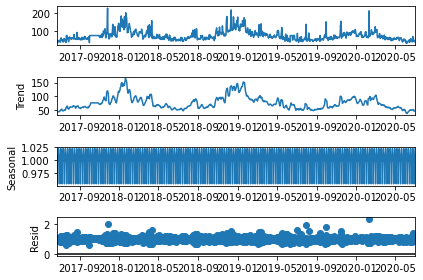

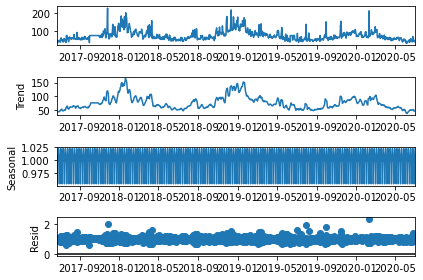

In [45]:
result.plot()

In [46]:
from statsmodels.tsa.stattools import adfuller

In [49]:
addsvalue=adfuller(d1['AQI'])

In [50]:
print('average test statistic is: ',addsvalue[0])

average test statistic is:  -3.091400412306325


In [52]:
print('p_value : ',addsvalue[1])

p_value :  0.02719617682278613


### AS THE P_VALUE IS LESS THAN 0.05, THE GIVEN FEATURE AQI IS STATIONARY

<AxesSubplot:>

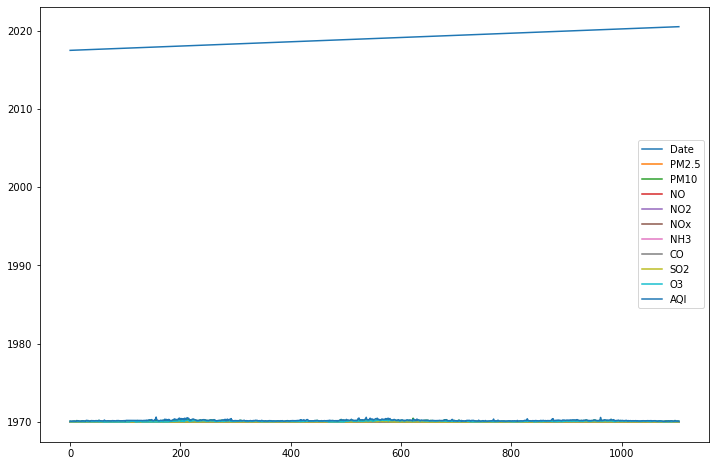

In [53]:
data.plot(figsize=(12,8))

<AxesSubplot:>

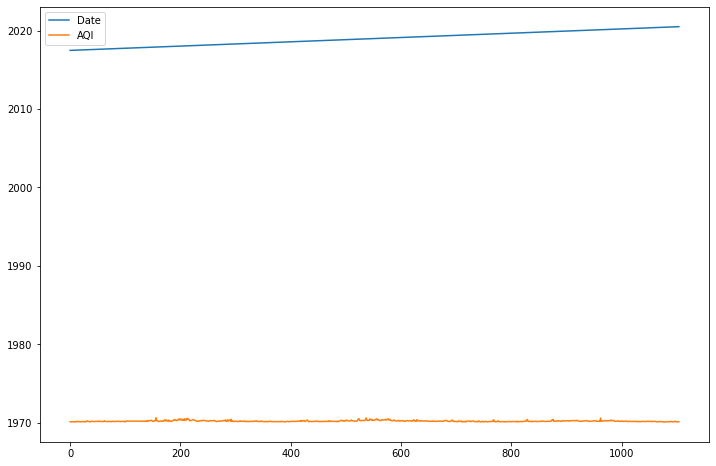

In [54]:
df.plot(figsize=(12,8))

<AxesSubplot:xlabel='Date'>

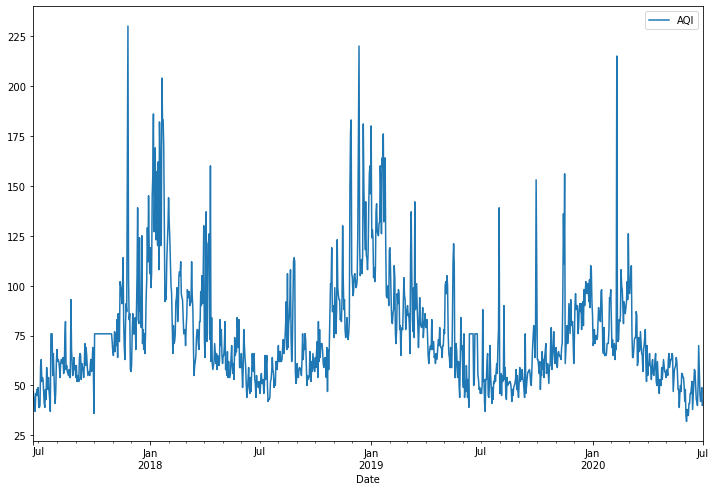

In [113]:
d1.plot(figsize=(12,8))

##### splitting into train and test data

In [72]:
len(d1)
len(d1) - 18    # 1.5 year
test_size = 18
test_index = len(df) - test_size
test_index

1087

In [73]:
train = d1[:856]
test = d1[856:]

In [74]:
train.head()

,AQI
Date,
2017-06-23,47.0
2017-06-24,44.0
2017-06-25,38.0
2017-06-26,37.0
2017-06-27,46.0


In [75]:
test.head()

,AQI
Date,
2019-10-27,63.0
2019-10-28,69.0
2019-10-29,77.0
2019-10-30,68.0
2019-10-31,61.0


min_max scaler

In [76]:
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

In [77]:
scaled_train[:5]

array([[0.05670103],
       [0.04123711],
       [0.01030928],
       [0.00515464],
       [0.05154639]])

## 3) PREDICTING THE FUTURE AQI values using LSTM

In [84]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [86]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

from tensorflow.keras.callbacks import EarlyStopping

In [87]:
length = 12

In [88]:
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [89]:
X, y = generator[0]

In [90]:
X

array([[[0.05670103],
        [0.04123711],
        [0.01030928],
        [0.00515464],
        [0.05154639],
        [0.04639175],
        [0.06185567],
        [0.04639175],
        [0.06701031],
        [0.01546392],
        [0.01546392],
        [0.02061856]]])

In [92]:
y

array([[0.12371134]])

In [93]:
len(X[0])

12

In [94]:
# LSTM:
n_features = 1

In [95]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [96]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [97]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [98]:
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=1)

In [99]:
model.fit(generator, epochs=20, 
          validation_data=validation_generator,
          callbacks=[early_stop])

Epoch 1/20
844/844 [==============================] - 3s 3ms/step - loss: 0.0106 - val_loss: 0.0068
Epoch 2/20
844/844 [==============================] - 2s 3ms/step - loss: 0.0092 - val_loss: 0.0063
Epoch 3/20
844/844 [==============================] - 2s 3ms/step - loss: 0.0089 - val_loss: 0.0058
Epoch 4/20
844/844 [==============================] - 2s 2ms/step - loss: 0.0085 - val_loss: 0.0064
Epoch 5/20
844/844 [==============================] - 2s 2ms/step - loss: 0.0083 - val_loss: 0.0056
Epoch 6/20
844/844 [==============================] - 2s 2ms/step - loss: 0.0080 - val_loss: 0.0055
Epoch 7/20
844/844 [==============================] - 2s 3ms/step - loss: 0.0077 - val_loss: 0.0061
Epoch 8/20
844/844 [==============================] - 2s 2ms/step - loss: 0.0078 - val_loss: 0.0055
Epoch 9/20
844/844 [==============================] - 2s 3ms/step - loss: 0.0079 - val_loss: 0.0064
Epoch 10/20
844/844 [==============================] - 2s 3ms/step - loss: 0.0077 - val_loss: 0.0056

In [100]:
losses = pd.DataFrame(model.history.history)

In [101]:
losses

,loss,val_loss
0,0.010624,0.006757
1,0.009152,0.006308
2,0.008868,0.005770
3,0.008496,0.006378
4,0.008306,0.005609
5,0.007958,0.005503
6,0.007745,0.006054
7,0.007817,0.005489
8,0.007863,0.006397
9,0.007672,0.005562


<AxesSubplot:>

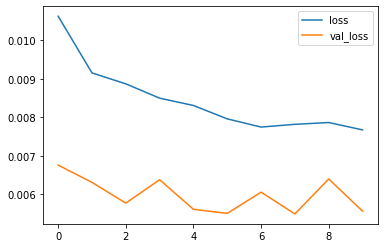

In [102]:
losses.plot()

In [103]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time  stamp ahead 
    current_pred = model.predict(current_batch)[0]
    
    # store prediction 
    test_predictions.append(current_pred)
    
    # update batch to now include prediction and drop first value 
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

true_prediction = scaler.inverse_transform(test_predictions)

1/1 [==============================] - 0s 15ms/step


In [104]:
test['Predictions'] = true_prediction

C:\Users\STUDENT\AppData\Local\Temp/ipykernel_14896/1596403840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_prediction


In [105]:
test

,AQI,Predictions
Date,,
2019-10-27,63.0,61.727431
2019-10-28,69.0,61.284499
2019-10-29,77.0,60.745031
2019-10-30,68.0,60.336878
2019-10-31,61.0,59.982869
...,...,...
2020-06-27,42.0,54.843537
2020-06-28,43.0,54.843537
2020-06-29,49.0,54.843537


<AxesSubplot:xlabel='Date'>

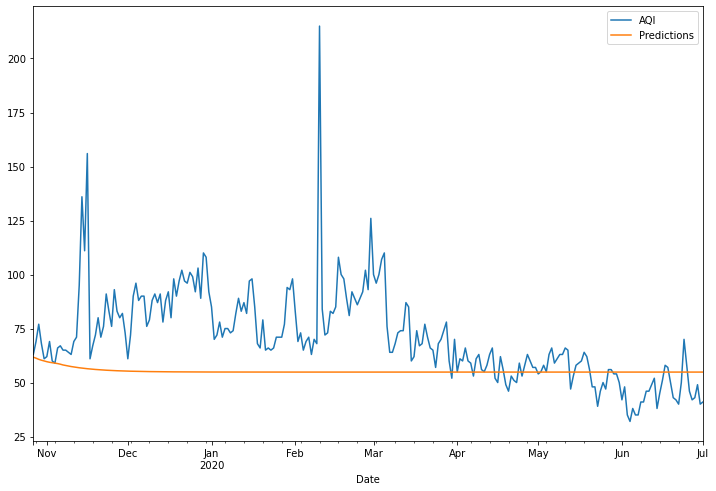

In [107]:
test.plot(figsize=(12,8))